In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('solarizedd')

In [192]:
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
import os

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [3]:
def read_data(file):
    with open(file, 'r') as f:
        data = f.read()
    bs_data = bs(data, 'xml') 
    return bs_data

def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r

def values_df(bs_data, low, high):
    b_name = bs_data.find_all('name')
    
    Attributes = []
    for i in range(len(b_name)):
        Attributes.append(b_name[i].get('value'))
    
    Attributes = list(set(Attributes))
    
    Collection = {}
    for i in range(low, high):
        r = calc(b_name, i)
        v = b_name[i].get('value')
        Collection[v] = r
    
    df = pd.DataFrame(Collection)
    return df

def get_mean_values_healthy(attribute, low, high):
    mean_list = []
    for i in range(len(os.listdir("../USE THIS/Healthy"))):
        if os.listdir("../USE THIS/Healthy")[i].startswith("timeseries"):
            try:
                bs_data = read_data(os.listdir("../USE THIS/Healthy")[i])
                df = values_df(bs_data,low,high)
                k = df.mean()[attribute]
                mean_list.append(k)
            except:
                print(os.listdir("../USE THIS/Healthy")[i] + " failed to compute")
        else:
            continue
        
    return mean_list
def get_mean_values_pfps(attribute, low, high):
    mean_list = []
    for i in range(len(os.listdir("../USE THIS/PFPS"))):
        if os.listdir("../USE THIS/PFPS")[i].startswith("timeseries"):
            try:
                bs_data = read_data(os.listdir("../USE THIS/PFPS")[i])
                df = values_df(bs_data,low,high)
                k = df.mean()[attribute]
                mean_list.append(k)
            except:
                print(os.listdir("../USE THIS/PFPS")[i] + " failed to compute")
        else:
            continue
        
    return mean_list





In [140]:
#1
i = 0
df_list_level1 = []
injurylevel = [0 for i in range(21)]
path = "../USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            
            df_list_level1.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level1 = pd.concat(df_list_level1)
data_level1['Injury level'] = injurylevel


print(f"Length of how many timeseries-files of healthy people we have for level 1: {i}")

#2
i = 0
df_list_level2 = []
injurylevel = [0 for i in range(22)]
path = "../USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            
            df_list_level2.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level2 = pd.concat(df_list_level2)
data_level2['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 2: {i}")

#3
i = 0
df_list_level3 = []
injurylevel = [0 for i in range(22)]
path = "../USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(len(b_name)/2), int(3*len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            
            df_list_level3.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level3 = pd.concat(df_list_level3)
data_level3['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 3: {i}")

#4
i = 0
df_list_level4 = []
injurylevel = [0 for i in range(21)]
path = "../USE THIS/Healthy/"


for xml_file in os.listdir(path):
    if xml_file.startswith ("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        
        try:
            df1 = values_df(bs_data, int(3*len(b_name)/4), int(len(b_name)))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            
            df_list_level4.append(df1)
            i+=1
        except:
            print(xml_file + "failed to compute")

data_level4 = pd.concat(df_list_level4)
data_level4['Injury level'] = injurylevel

print(f"Length of how many timeseries-files of healthy people we have for level 4: {i}")



timeseries-10.xmlfailed to compute
timeseries-44.xmlfailed to compute
Length of how many timeseries-files we have for level 1: 21
timeseries-10.xmlfailed to compute
Length of how many timeseries-files we have for level 2: 22
timeseries-10.xmlfailed to compute
Length of how many timeseries-files we have for level 3: 22
timeseries-10.xmlfailed to compute
timeseries-23.xmlfailed to compute
Length of how many timeseries-files we have for level 4: 21


In [144]:
data_combined = pd.concat([data_level1, data_level2, data_level3, data_level4])

In [143]:
#1
df_list2_level1 = []
injurylevel2 = [1 for i in range(20)]
path = "../USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            df_list2_level1.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level1 = pd.concat(df_list2_level1)
data2_level1['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 1: {i}")

#2
df_list2_level2 = []
injurylevel2 = [1 for i in range(20)]
path = "../USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            df_list2_level2.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level2 = pd.concat(df_list2_level2)
data2_level2['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 2: {i}")

#3
df_list2_level3 = []
injurylevel2 = [1 for i in range(20)]
path = "../USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            df_list2_level3.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level3 = pd.concat(df_list2_level3)
data2_level3['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 3: {i}")

#4

df_list2_level4 = []
injurylevel2 = [1 for i in range(20)]
path = "../USE THIS/PFPS/"

i = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = values_df(bs_data, int(len(b_name)/4), int(len(b_name)/2))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            df_list2_level4.append(df1)
            i+=1
            
        except:
            print(xml_file + "failed to compute")
            
data2_level4 = pd.concat(df_list2_level4)
data2_level4['Injury level'] = injurylevel2

print(f"Length of how many timeseries-files of PFPS people we have for level 4: {i}")

Length of how many timeseries-files of PFPS people we have for level 1: 20
Length of how many timeseries-files of PFPS people we have for level 2: 20
Length of how many timeseries-files of PFPS people we have for level 3: 20
Length of how many timeseries-files of PFPS people we have for level 4: 20


In [146]:
data2_combined = pd.concat([data2_level1, data2_level2, data2_level3, data2_level4])

In [53]:
# injured = 1, uninjured = 0


In [186]:
data3_level1 = pd.concat([data_level1, data2_level1]).reset_index(drop = True)
data3_level2 = pd.concat([data_level2, data2_level2]).reset_index(drop = True)
data3_level3 = pd.concat([data_level3, data2_level3]).reset_index(drop = True)
data3_level4 = pd.concat([data_level4, data2_level4]).reset_index(drop = True)

In [187]:
data3_combined = pd.concat([data_combined, data2_combined])


In [174]:
y = data3_combined['Injury level']
y = pd.DataFrame(y, columns = ['Injury level'])
X = data3_combined.drop(['Injury level'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



In [175]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

sc = StandardScaler()
X_train = sc.fit_transform(imputed_X_train)
X_test = sc.transform(imputed_X_test)

In [176]:


#Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score1 = accuracy_score(y_test, y_pred)
print(score1)

[[14  2]
 [ 3 15]]
0.8529411764705882


c:\users\siddhant\desktop\pytcu11\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [177]:
#Random Forest
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score2 = accuracy_score(y_test, y_pred)
print(score2)

[[16  0]
 [ 1 17]]
0.9705882352941176


C:\Users\Siddhant\AppData\Local\Temp/ipykernel_12628/1515588831.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2.fit(X_train, y_train)


In [178]:
#Naive Bayes
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score3 = accuracy_score(y_test, y_pred)
print(score3)

[[10  6]
 [ 6 12]]
0.6470588235294118


c:\users\siddhant\desktop\pytcu11\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [179]:
#KNC
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score4 = accuracy_score(y_test, y_pred)
print(score4)

[[15  1]
 [ 2 16]]
0.9117647058823529


c:\users\siddhant\desktop\pytcu11\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [180]:
#SVC
classifier5 = SVC(kernel = 'linear', random_state = 0)
classifier5.fit(X_train, y_train)
y_pred = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score5 = accuracy_score(y_test, y_pred)
print(score5)

[[12  4]
 [ 2 16]]
0.8235294117647058


c:\users\siddhant\desktop\pytcu11\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [181]:
#XGB
classifier6 = XGBClassifier(use_label_encoder = False)
classifier6.fit(X_train, y_train)
y_pred = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
score6 = accuracy_score(y_test, y_pred)
print(score6)

[21:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15  1]
 [ 1 17]]
0.9411764705882353


In [188]:
def get_accuracy(algorithm, data, test_size):
    if algorithm == KNeighborsClassifier:
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    elif algorithm == RandomForestClassifier:
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    else:
        classifier = algorithm()
    y = data['Injury level']
    y = pd.DataFrame(y, columns = ['Injury level'])
    X = data.drop(['Injury level'], axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
    imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

    imputed_X_train.columns = X_train.columns
    imputed_X_test.columns = X_test.columns

    sc = StandardScaler()
    X_train = sc.fit_transform(imputed_X_train)
    X_test = sc.transform(imputed_X_test)
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

        
    
    

In [203]:
rf1 = get_accuracy(RandomForestClassifier, data3_level1, 0.25)
rf2 = get_accuracy(RandomForestClassifier, data3_level2, 0.25)
rf3 = get_accuracy(RandomForestClassifier, data3_level3, 0.25)
rf4 = get_accuracy(RandomForestClassifier, data3_level4, 0.25)
rf5 = get_accuracy(RandomForestClassifier, data3_combined, 0.25)

knc1 = get_accuracy(KNeighborsClassifier, data3_level1, 0.25)
knc2 = get_accuracy(KNeighborsClassifier, data3_level2, 0.25)
knc3 = get_accuracy(KNeighborsClassifier, data3_level3, 0.25)
knc4 = get_accuracy(KNeighborsClassifier, data3_level4, 0.25)
knc5 = get_accuracy(KNeighborsClassifier, data3_combined, 0.25)

x1 = get_accuracy(XGBClassifier, data3_level1, 0.25)
x2 = get_accuracy(XGBClassifier, data3_level2, 0.25)
x3 = get_accuracy(XGBClassifier, data3_level3, 0.25)
x4 = get_accuracy(XGBClassifier, data3_level4, 0.25)
x5 = get_accuracy(XGBClassifier, data3_combined, 0.25)

s1 = get_accuracy(SVC, data3_level1, 0.25)
s2 = get_accuracy(SVC, data3_level2, 0.25)
s3 = get_accuracy(SVC, data3_level3, 0.25)
s4 = get_accuracy(SVC, data3_level4, 0.25)
s5 = get_accuracy(SVC, data3_combined, 0.25)

[22:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

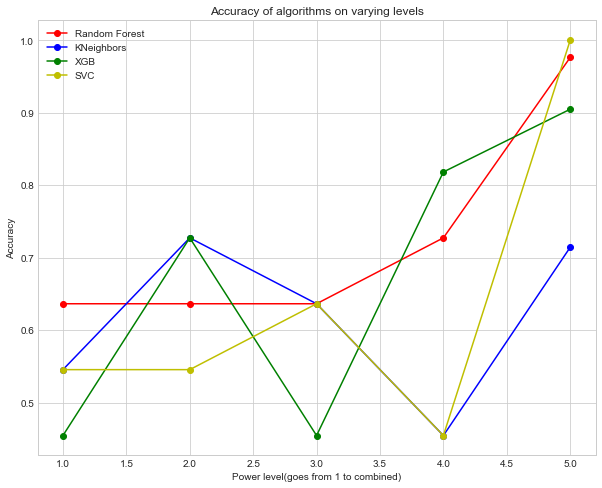

In [204]:
plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5], [rf1,rf2,rf3,rf4,rf5], 'ro-', label = "Random Forest")
plt.plot([1,2,3,4,5], [knc1,knc2,knc3,knc4,knc5], 'bo-', label = "KNeighbors")
plt.plot([1,2,3,4,5], [x1,x2,x3,x4,x5], 'go-', label = "XGB")
plt.plot([1,2,3,4,5], [s1,s2,s3,s4,s5], 'yo-', label = "SVC")
plt.title("Accuracy of algorithms on varying levels")
plt.xlabel("Power level(goes from 1 to combined)")
plt.ylabel("Accuracy")
plt.legend()
